# HEART DISEASE PREDICTION PROJECT

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random as rnd
import os
import warnings
from operator import add

#<<<<<<<<<<< READING DATA >>>>>>>>>>>>>
df = pd.read_csv('heart.csv')
df.head()



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [2]:
df.shape

(303, 14)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
df.describe()



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
#<<<<< CHECKING UNIQUE VALUES >>>>>>>>>

print("Unique values of categorical variables")
print("\nSex: ", df.sex.unique())
print("Cp: ", sorted(df.cp.unique()))
print("fbs: ", sorted(df.fbs.unique()))
print("restecg: ", sorted(df.restecg.unique()))
print("exang: ", sorted(df.exang.unique()))
print("slope: ", sorted(df.slope.unique()))
print("ca: ", sorted(df.ca.unique()))
print("thal: ", sorted(df.thal.unique()))
print("target: ", sorted(df.target.unique()))

Unique values of categorical variables

Sex:  [1 0]
Cp:  [0, 1, 2, 3]
fbs:  [0, 1]
restecg:  [0, 1, 2]
exang:  [0, 1]
slope:  [0, 1, 2]
ca:  [0, 1, 2, 3, 4]
thal:  [0, 1, 2, 3]
target:  [0, 1]


In [6]:
df.notnull().values.any() 
# Output shows there are no null values in df

True

In [7]:

def draw_semi_pie_chart(data, column, fig, renamed_index_dict, title):
    default_colors = ['#66b3ff', '#ff9999', '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6', '#ff6666']
    rnd.shuffle(default_colors)
    ax = df[column].value_counts().rename(index = renamed_index_dict).plot.pie(colors = default_colors, autopct='%1.1f%%', startangle=90, title = title)
    ax.set_ylabel('')
    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(20)
        
   # centre_circle = plt.Circle((0,0), 0.60, fc='white')
    #fig.gca().add_artist(centre_circle)

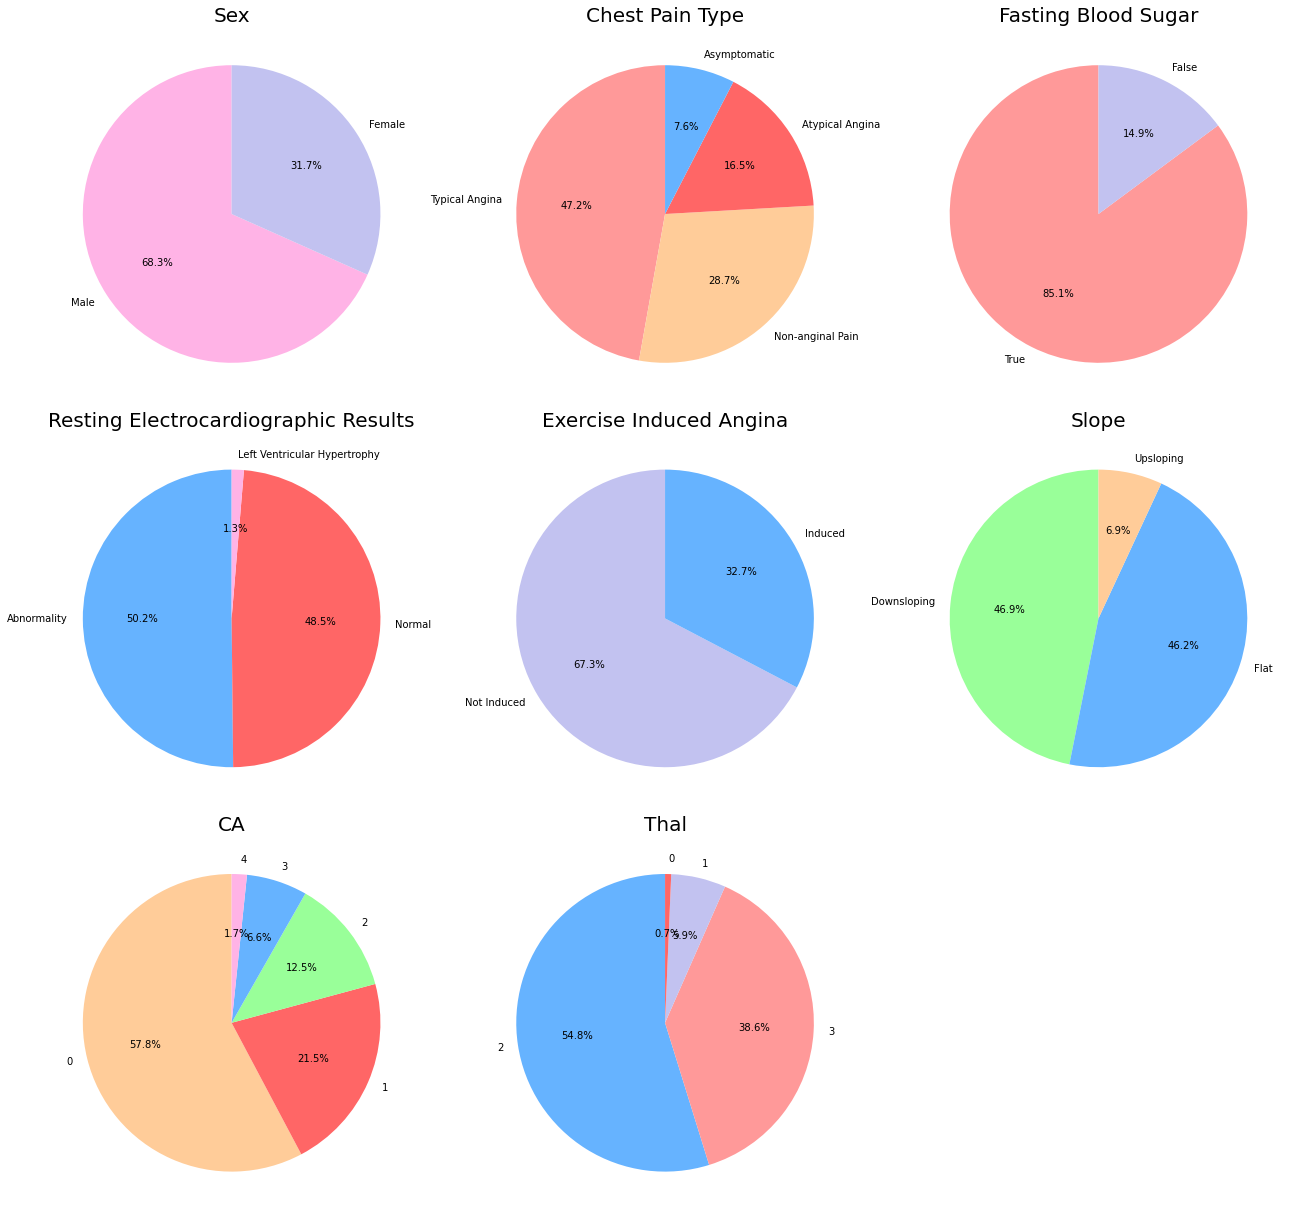

In [8]:
fig = plt.gcf()
fig.set_size_inches(18, 17)
grid_rows = 3
grid_cols = 3

# Draw Sex Pie chart
plt.subplot(grid_rows, grid_cols, 1)
draw_semi_pie_chart(df, 'sex', fig, {0: 'Female', 1: 'Male'}, 'Sex')

# Draw Chest pain type chart
plt.subplot(grid_rows, grid_cols, 2)
draw_semi_pie_chart(df, 'cp', fig, {0:'Typical Angina', 1:'Atypical Angina', 2:'Non-anginal Pain',3:'Asymptomatic'}, 'Chest Pain Type')

# Draw Fasting blood sugar chart
plt.subplot(grid_rows, grid_cols, 3)
draw_semi_pie_chart(df, 'fbs', fig, {0:'True', 1:'False'}, 'Fasting Blood Sugar')

# Draw restecg - resting electrocardiographic results
plt.subplot(grid_rows, grid_cols, 4)
draw_semi_pie_chart(df, 'restecg', fig, {0:'Normal', 1:'Abnormality', 2:'Left Ventricular Hypertrophy'}, 'Resting Electrocardiographic Results')

# Draw exang - exercise induced angina
plt.subplot(grid_rows, grid_cols, 5)
draw_semi_pie_chart(df, 'exang', fig, {0:'Not Induced', 1:'Induced'}, 'Exercise Induced Angina')

# Draw exang - exercise induced angina
plt.subplot(grid_rows, grid_cols, 6)
draw_semi_pie_chart(df, 'slope', fig, {0:'Upsloping', 1:'Flat', 2:'Downsloping'}, 'Slope')

# Draw ca
plt.subplot(grid_rows, grid_cols, 7)
draw_semi_pie_chart(df, 'ca', fig, {0:'0', 1:'1', 2:'2', 3:'3', 4:'4'}, 'CA')

# Draw thal
plt.subplot(grid_rows, grid_cols, 8)
draw_semi_pie_chart(df, 'thal', fig, {0:'0', 1:'1', 2:'2', 3:'3'}, 'Thal')

fig.tight_layout()
plt.show()

# DETAILED COLUMN-WISE ANALYSIS ARE:


- Dataset contains more male patients than female.

- Typical Angina and Non-Anginal is the common Chest pain type.

- Most of the patients has Fasting Blood Sugar > 120 mg/dl.

- Left Ventricular Hypertrophy is observed least in Resting Electrocardiographics Results.

- Excersize didn't induce Angina for more than 60%+ patients.

- Unslopping is least observed in the Slope.

- Least type of CA is 4 and most type is 0

- Least type of Thal is 0 and most type is 2

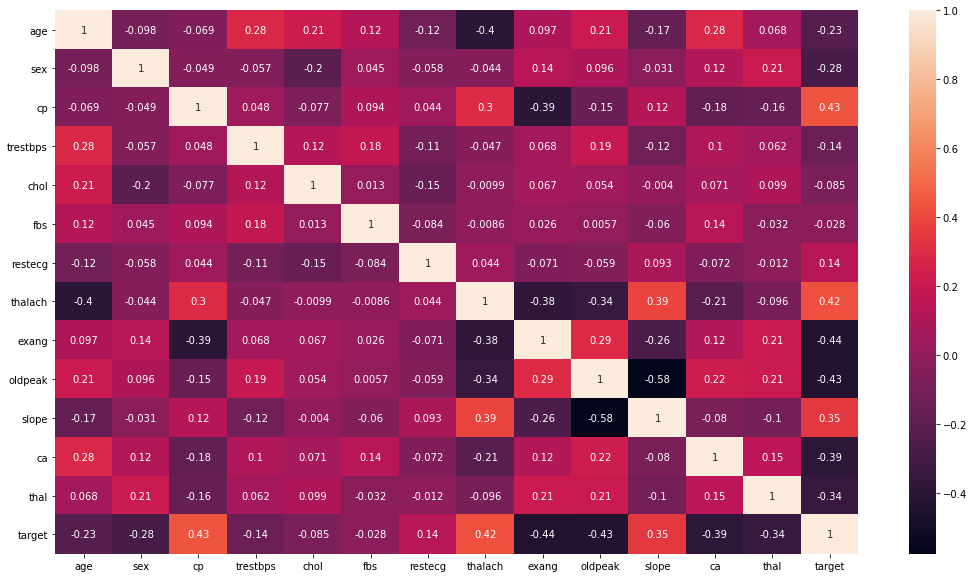

In [9]:
fig = plt.gcf()
fig = fig.set_size_inches(18, 10)
sns.heatmap(df.corr(), annot = True)
plt.show()

There is no features with more than 0.5 correlation. 

In [10]:
#continuous_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target']
#number_of_columns = len(continuous_features)
#number_of_rows = 5
#plt.figure(figsize=(30,35))

#for i, f in enumerate(continuous_features):
    #plt.subplot(number_of_rows + 1, number_of_columns, i + 1)
    #sns.distplot(df[f], kde=True)

# Key points from above graphical representation

The features Age, trestbps, chol are normally distributed

The likelihood of getting heart disease of more for the people with age 50 - 60


The target variable is balanced.

## DATA PRE PROCESSING

In [11]:
# <<<<<<<<< Extract Independent and Target Variables >>>>>>>>>>>
nominal_features = ['cp', 'slope', 'thal', 'restecg']
x = pd.get_dummies(df.drop(['target'], axis = 1), columns = nominal_features, drop_first=True).values
y = df.target.values
x.shape

(303, 19)

## SPLIT DATA INTO TRAIN AND TEST SETS

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.35, random_state = 0)
x_train.shape

(196, 19)

## FEATURE SCALING

In [13]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# Applying Decision Tree 

In [14]:
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn import metrics
from sklearn.metrics import confusion_matrix

from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)
accuracies = {}
acc = dtc.score(x_test, y_test)
accuracies['Decision Tree'] = acc
print("Decision Tree Test Accuracy {:.2f}".format(acc))

Decision Tree Test Accuracy 0.77


In [15]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(dtc, x_train, y_train, cv = 10)

print("Accuracy of Decision Tree after Cross Validation : ", round(scores.mean(), 2) * 100, "%")


Accuracy of Decision Tree after Cross Validation :  78.0 %


# Applying SVM

In [16]:
from sklearn import tree
from sklearn import svm
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn import metrics
from sklearn.metrics import confusion_matrix

from sklearn.tree import DecisionTreeClassifier
clf = svm.SVC()
clf.fit(x_train, y_train)
ypred=clf.predict(x_test)

accuracies = {}
acc = clf.score(x_test, y_test)
accuracies['SVM Tree'] = acc
print("SVM Test Accuracy",round(acc.mean(), 2) * 100, "%")



SVM Test Accuracy 80.0 %


In [17]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, x_train, y_train, cv = 10)

print("Accuracy of SVM after Cross Validation : ", round(scores.mean(), 2) * 100, "%")


Accuracy of SVM after Cross Validation :  79.0 %


              precision    recall  f1-score   support

           0       0.74      0.85      0.79        46
           1       0.87      0.77      0.82        61

    accuracy                           0.80       107
   macro avg       0.80      0.81      0.80       107
weighted avg       0.81      0.80      0.80       107



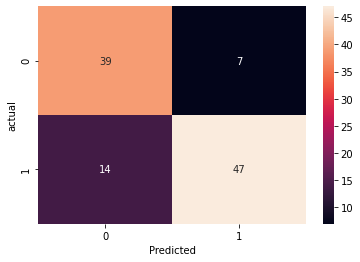

In [18]:
ypred2=clf.predict(x_test)
#print(ypred2)

CM2 = confusion_matrix(ypred,y_test)
CM2

print(classification_report(ypred,y_test))
sns.heatmap(CM2, annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('actual')
plt.show()

# Applying Random Forest

In [19]:
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn import metrics
from sklearn.metrics import confusion_matrix

from sklearn.tree import DecisionTreeClassifier
ran = RandomForestClassifier()
ran.fit(x_train, y_train)


accuracies = {}
acc = ran.score(x_test, y_test)
accuracies['Decision Tree'] = acc
print("Random Forest Test Accuracy {:.2f}".format(acc))

Random Forest Test Accuracy 0.79


In [20]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(ran, x_train, y_train, cv = 10)

print("Accuracy: ", round(scores.mean(), 2) * 100, "%")


Accuracy:  84.0 %


              precision    recall  f1-score   support

           0       0.77      0.80      0.79        51
           1       0.81      0.79      0.80        56

    accuracy                           0.79       107
   macro avg       0.79      0.79      0.79       107
weighted avg       0.80      0.79      0.79       107



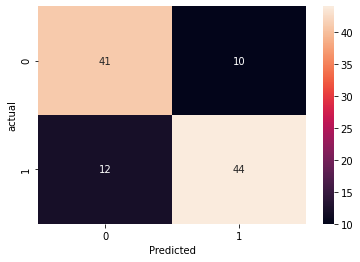

In [21]:

ypred2=ran.predict(x_test)
#print(ypred2)

CM2 = confusion_matrix(ypred2,y_test)
CM2
print(classification_report(ypred2,y_test))
sns.heatmap(CM2, annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('actual')
plt.show()

Accuracy:  0.794392523364486
Predicted   0   1  All
Actual                
0          41  12   53
1          10  44   54
All        51  56  107


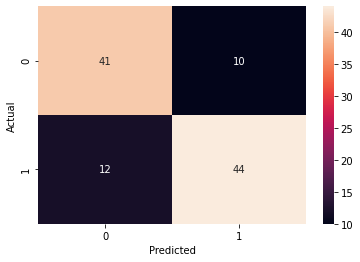

In [22]:
print("Accuracy: ", metrics.accuracy_score(y_test, ypred2))

CM2 = confusion_matrix(ypred2,y_test)
print(pd.crosstab(y_test, ypred2, rownames = ['Actual'], colnames = ['Predicted'],margins = True))
sns.heatmap(CM2, annot = True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()